<a href="https://colab.research.google.com/github/Juan-jdq/Diseno-y-analisis-de-algoritmos-cuanticos/blob/main/TablafDistintosQubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install qiskit[visualization]
!pip install matplotlib
token = "VDSfIdpDSZVHlMUqIoncjTa9_tiTwIGId01WYgdzqCYd"
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
  token=token, # Your token is confidential.
  # Do not share your key in public code.
  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/8ba84995f3ac449d96f4bd22cc072a2f:9239c104-257b-4620-ab6a-4f259e315c7f::",
  name="juanSanzPeralta", # Optionally name this set of account credentials.
  set_as_default=True, # Optionally set these as your default credentials.
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [2]:
import qiskit
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
import matplotlib
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.primitives import BitArray
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

In [3]:
#f3(a0,a1,a2)=xor(xor(a0,a1),a2)
# q0=a0, q1=a1, q2=a2, q3=ancilla destino
circ_f3 = QuantumCircuit(4)
circ_f3.cx(0, 3)
circ_f3.cx(1, 3)
circ_f3.cx(2, 3)
gate_f3 = circ_f3.to_gate(label='U_f3')

# --- Deutsch–Jozsa n=3 ---
dj3 = QuantumCircuit(4, 3)
dj3.x(3)
dj3.h(range(4))
dj3.barrier()
dj3.append(gate_f3, [0,1,2,3], [])
dj3.barrier()
dj3.h([0,1,2])
dj3.measure([0,1,2],[0,1,2])
isa_circuitf3 = pm.run(dj3)

In [ ]:
ejecuciones=[]

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf3])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13i4ptfetss73eonlb0


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf3])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f3",ids))
print(ejecuciones)

In [4]:
ejecuciones=[('f3',['d1eic6tqbivc73eb8e90','d1elikiq8ogc73es9ed0','d1elnfi576rs73cmltgg','d1elnkugljis73cm8be0','d1elnmdqbivc73ebbi1g']),('f4',['d1f82qlqbivc73ebt8f0','d1fcpjmgljis73cmuigg','d1fcplegljis73cmuiig','d1fcpna576rs73cncnlg','d1fcpotqbivc73ec2470']),('f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), ('f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), ('f7', ['d1fsfkugljis73cnec9g', 'd1fsfmdqbivc73eci16g', 'd1fsfnaq8ogc73etfhsg', 'd1fsfoi576rs73cnsp0g', 'd1fsfpqq8ogc73etfi00'])]

In [4]:
#f(a0,a1,a2,a3)=xor(xor(a0,a1),a2)
circ_f4 = QuantumCircuit(5)
circ_f4.cx(0, 4)
circ_f4.cx(1, 4)
circ_f4.cx(2, 4)
gate_f4 = circ_f4.to_gate(label='U_f4')

dj4 = QuantumCircuit(5, 4)
dj4.x(4)
dj4.h(range(5))
dj4.barrier()
dj4.append(gate_f4, [0,1,2,3,4], [])
dj4.barrier()
dj4.h([0,1,2,3])
dj4.measure([0,1,2,3],[0,1,2,3])
isa_circuitf4 = pm.run(dj4)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf4])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13i62nanitc73cjujng


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf4])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f4",ids))
print(ejecuciones)

KeyboardInterrupt: 

In [5]:
#f(a0,a1,a2,a3,a4)=xor(xor(a0,a1),a2)
circ_f5 = QuantumCircuit(6)
circ_f5.cx(0, 5)
circ_f5.cx(1, 5)
circ_f5.cx(2, 5)
gate_f5 = circ_f5.to_gate(label='U_f5')

dj5 = QuantumCircuit(6, 5)
dj5.x(5)
dj5.h(range(6))
dj5.barrier()
dj5.append(gate_f5, [0,1,2,3,4,5], [])
dj5.barrier()
dj5.h([0,1,2,3,4])
dj5.measure([0,1,2,3,4],[0,1,2,3,4])
isa_circuitf5 = pm.run(dj5)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf5])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13i6m5fetss73eono8g


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf5])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f5",ids))
print(ejecuciones)

>>> Job ID: d1frpma576rs73cns470
>>> Job ID: d1frt6a576rs73cns7l0
>>> Job ID: d1fs95iq8ogc73etfbtg
>>> Job ID: d1fs9bq576rs73cnsj6g
>>> Job ID: d1fs9dlqbivc73echrfg
[('f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg'])]


In [6]:
#f(a0,a1,a2,a3,a4,a5)=xor(xor(a0,a1),a2)
circ_f6 = QuantumCircuit(7)
circ_f6.cx(0, 6)
circ_f6.cx(1, 6)
circ_f6.cx(2, 6)
gate_f6 = circ_f6.to_gate(label='U_f6')

dj6 = QuantumCircuit(7, 6)
dj6.x(6)
dj6.h(range(7))
dj6.barrier()
dj6.append(gate_f6, list(range(7)), [])
dj6.barrier()
dj6.h([0,1,2,3,4,5])
dj6.measure(list(range(6)), list(range(6)))
isa_circuitf6 = pm.run(dj6)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf6])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13i795fetss73eonou0


In [9]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf6])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f6",ids))
print(ejecuciones)

>>> Job ID: d1fsaemgljis73cne7j0
>>> Job ID: d1fsafugljis73cne7kg
>>> Job ID: d1fsah2q8ogc73etfd5g
>>> Job ID: d1fsaidqbivc73echsgg
>>> Job ID: d1fsajdqbivc73echsi0
[('f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), ('f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0'])]


In [7]:
#f(a0,a1,...,a6)=xor(xor(a0,a1),a2)
circ_f7 = QuantumCircuit(8)
circ_f7.cx(0, 7)
circ_f7.cx(1, 7)
circ_f7.cx(2, 7)
gate_f7 = circ_f7.to_gate(label='U_f7')

dj7 = QuantumCircuit(8, 7)
dj7.x(7)
dj7.h(range(8))
dj7.barrier()
dj7.append(gate_f7, list(range(8)), [])
dj7.barrier()
dj7.h(list(range(7)))
dj7.measure(list(range(7)), list(range(7)))
isa_circuitf7 = pm.run(dj7)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf7])     # aquí solo pasas el circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13i7o7anitc73cjulm0


In [11]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf7])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f7",ids))
print(ejecuciones)

>>> Job ID: d1fsfkugljis73cnec9g
>>> Job ID: d1fsfmdqbivc73eci16g
>>> Job ID: d1fsfnaq8ogc73etfhsg
>>> Job ID: d1fsfoi576rs73cnsp0g
>>> Job ID: d1fsfpqq8ogc73etfi00
[('f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), ('f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), ('f7', ['d1fsfkugljis73cnec9g', 'd1fsfmdqbivc73eci16g', 'd1fsfnaq8ogc73etfhsg', 'd1fsfoi576rs73cnsp0g', 'd1fsfpqq8ogc73etfi00'])]


In [ ]:
circ_Id=[(isa_circuitf3,"d13i4ptfetss73eonlb0","f3"),(isa_circuitf4,"d13i62nanitc73cjujng","f4"),(isa_circuitf5,"d13i6m5fetss73eono8g","f5"),(isa_circuitf6,"d13i795fetss73eonou0","f6"),(isa_circuitf7,"d13i7o7anitc73cjulm0","f7")]

In [ ]:
import pandas as pd
propiedades=[]
for i in circ_Id:
  profundidad=i[0].depth()
  operaciones=i[0].count_ops()
  job_id=i[1]
  job=service.job(job_id)
  result = job.result()
  cero=len(list(result[0].data.c.get_counts().keys())[0])*'0'
  tasa_ceros=result[0].data.c.get_counts()[cero]*100/4096
  spans = job.result().metadata["execution"]["execution_spans"]
  segundos_ejecucion= spans.duration
  propiedades.append({"funcion":i[2],"profundidad":profundidad,"% de ceros":tasa_ceros,"segundos de ejecucion":segundos_ejecucion})


In [ ]:
tabla=pd.DataFrame(propiedades)
tabla.set_index("funcion", inplace=True)
tabla

,profundidad,% de ceros,segundos de ejecucion
funcion,,,
f3,16,0.976562,1.950205
f4,16,1.367188,2.058461
f5,16,1.025391,2.010549
f6,16,1.147461,3.078833
f7,16,6.884766,2.064662


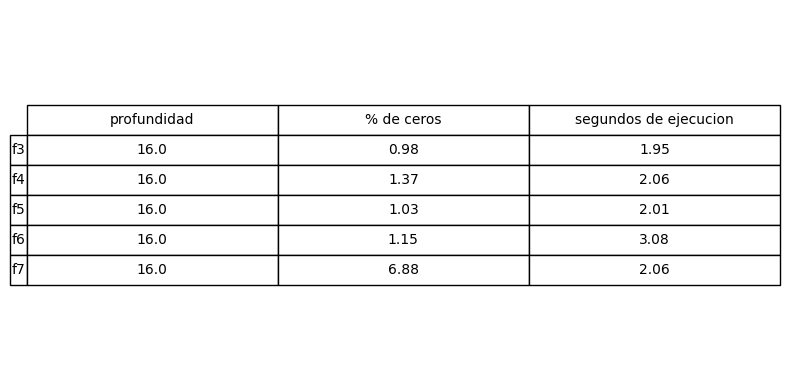

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# ejes ocultos
ax.axis('off')
ax.axis('tight')

# Crea tabla
table = ax.table(cellText=tabla.round(2).values,
                 colLabels=tabla.columns,
                 rowLabels=tabla.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuitf3,isa_circuitf4,isa_circuitf5,isa_circuitf6,isa_circuitf7]) #Probamos a hacer el sampler de todos los circuitos a la vez.
                                                                                           #Hay que cambiar algo el código y se puede, pero no vamos a poder medir el tiempo de ejecución de cada circuito
result = job.result()

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d13ibe9gmdms73cfr45g


In [ ]:
job.result()

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=4>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=5>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=6>)), metadata={'circuit_metadata': {}}), SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=7>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-09 18:19:44', stop='2025-06-09 18:19:50', size=20480>)])}, 'version': 2})

In [ ]:
result[0].data.c.get_counts()


{'111': 3815,
 '101': 79,
 '110': 50,
 '011': 90,
 '001': 28,
 '000': 24,
 '100': 6,
 '010': 4}

In [ ]:
result[1].data.c.get_counts()

{'0111': 3848,
 '0011': 43,
 '1111': 29,
 '0101': 37,
 '0110': 64,
 '0000': 43,
 '0100': 8,
 '0001': 22,
 '0010': 2}

In [ ]:
result[2].data.c.get_counts()

{'00111': 3760,
 '00100': 8,
 '00110': 82,
 '00011': 39,
 '00101': 64,
 '01111': 21,
 '00000': 62,
 '10111': 36,
 '00001': 15,
 '01100': 1,
 '00010': 7,
 '10000': 1}

In [ ]:
circ_IdS=[(isa_circuitf3,0,"f3"),(isa_circuitf4,1,"f4"),(isa_circuitf5,2,"f5"),(isa_circuitf6,3,"f6"),(isa_circuitf7,4,"f7")]

In [ ]:
import pandas as pd
propiedades=[]
id="d13ibe9gmdms73cfr45g"
job=service.job(id)
result = job.result()
for i in circ_IdS:
  profundidad=i[0].depth()
  operaciones=i[0].count_ops()

  cero=len(list(result[i[1]].data.c.get_counts().keys())[0])*'0'
  tasa_ceros=result[i[1]].data.c.get_counts()[cero]*100/4096
  spans = job.result().metadata["execution"]["execution_spans"]
  segundos_ejecucion= spans.duration
  propiedades.append({"funcion":i[2],"profundidad":profundidad,"% de ceros":tasa_ceros,"segundos de ejecucion":segundos_ejecucion})

In [ ]:
tabla=pd.DataFrame(propiedades)
tabla.set_index("funcion", inplace=True)
tabla

,profundidad,% de ceros,segundos de ejecucion
funcion,,,
f3,16,0.585938,6.205733
f4,16,1.049805,6.205733
f5,16,1.513672,6.205733
f6,16,1.074219,6.205733
f7,16,4.150391,6.205733


In [8]:
#f(a0,a1,...,a9)=xor(xor(a0,a1),a2)
circ_f10 = QuantumCircuit(11)
circ_f10.cx(0, 10)
circ_f10.cx(1, 10)
circ_f10.cx(2, 10)
gate_f10 = circ_f10.to_gate(label='U_f10')

dj10 = QuantumCircuit(11, 10)
dj10.x(10)
dj10.h(range(11))
dj10.barrier()
dj10.append(gate_f10, list(range(11)), [])
dj10.barrier()
dj10.h(list(range(10)))
dj10.measure(list(range(10)), list(range(10)))
isa_circuitf10 = pm.run(dj10)

In [22]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf10])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f10",ids))
print(ejecuciones)

>>> Job ID: d1g3m6i576rs73co3s40
>>> Job ID: d1g3m8aq8ogc73etmj40
>>> Job ID: d1g3m9lqbivc73ecp2i0
>>> Job ID: d1g3mh6gljis73cnldfg
>>> Job ID: d1g3miiq8ogc73etmje0
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e840710>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e2ed050>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e3951d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9d45e410>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [9]:
#f(a0,a1,...,a19)=xor(xor(a0,a1),a2)
circ_f20 = QuantumCircuit(21)
circ_f20.cx(0, 20)
circ_f20.cx(1, 20)
circ_f20.cx(2, 20)
gate_f20 = circ_f20.to_gate(label='U_f20')

dj20 = QuantumCircuit(21, 20)
dj20.x(20)
dj20.h(range(21))
dj20.barrier()
dj20.append(gate_f20, list(range(21)), [])
dj20.barrier()
dj20.h(list(range(20)))
dj20.measure(list(range(20)), list(range(20)))
isa_circuitf20 = pm.run(dj20)

In [24]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf20])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f20",ids))
print(ejecuciones)

>>> Job ID: d1g3o05qbivc73ecp48g
>>> Job ID: d1g3o1dqbivc73ecp4b0
>>> Job ID: d1g3o2dqbivc73ecp4cg
>>> Job ID: d1g3o3lqbivc73ecp4f0
>>> Job ID: d1g3o4q576rs73co3tvg
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e840710>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e2ed050>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e3951d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9d45e410>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [10]:
#f(a0,a1,...,a39)=xor(xor(a0,a1),a2)
circ_f40 = QuantumCircuit(41)
circ_f40.cx(0, 40)
circ_f40.cx(1, 40)
circ_f40.cx(2, 40)
gate_f40 = circ_f40.to_gate(label='U_f40')

dj40 = QuantumCircuit(41, 40)
dj40.x(40)
dj40.h(range(41))
dj40.barrier()
dj40.append(gate_f40, list(range(41)), [])
dj40.barrier()
dj40.h(list(range(40)))
dj40.measure(list(range(40)), list(range(40)))
isa_circuitf40 = pm.run(dj40)

In [26]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf40])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f40",ids))
print(ejecuciones)

>>> Job ID: d1g3tomgljis73cnlkk0
>>> Job ID: d1g3tqegljis73cnlkm0
>>> Job ID: d1g3trmgljis73cnlkn0
>>> Job ID: d1g3tsmgljis73cnlkp0
>>> Job ID: d1g3tudqbivc73ecpa8g
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e840710>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e2ed050>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e3951d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9d45e410>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [11]:
#f(a0,a1,...,a79)=xor(xor(a0,a1),a2)
circ_f80 = QuantumCircuit(81)
circ_f80.cx(0, 80)
circ_f80.cx(1, 80)
circ_f80.cx(2, 80)
gate_f80 = circ_f80.to_gate(label='U_f80')

dj80 = QuantumCircuit(81, 80)
dj80.x(80)
dj80.h(range(81))
dj80.barrier()
dj80.append(gate_f80, list(range(81)), [])
dj80.barrier()
dj80.h(list(range(80)))
dj80.measure(list(range(80)), list(range(80)))
isa_circuitf80 = pm.run(dj80)

In [28]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf80])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f80",ids))
print(ejecuciones)

>>> Job ID: d1g3uui576rs73co44ag
>>> Job ID: d1g3v0a576rs73co44c0
>>> Job ID: d1g3v1mgljis73cnlls0
>>> Job ID: d1g3v2qq8ogc73etmrhg
>>> Job ID: d1g3v45qbivc73ecpbbg
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e840710>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e2ed050>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e3951d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9d45e410>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [12]:
#f(a0,a1,...,a99)=xor(xor(a0,a1),a2)
circ_f100 = QuantumCircuit(101)
circ_f100.cx(0, 100)
circ_f100.cx(1, 100)
circ_f100.cx(2, 100)
gate_f100 = circ_f100.to_gate(label='U_f100')

dj100 = QuantumCircuit(101, 100)
dj100.x(100)
dj100.h(range(101))
dj100.barrier()
dj100.append(gate_f100, list(range(101)), [])
dj100.barrier()
dj100.h(list(range(100)))
dj100.measure(list(range(100)), list(range(100)))
isa_circuitf100 = pm.run(dj100)

In [35]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf100])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f100",ids))
print(ejecuciones)

>>> Job ID: d1g4562q8ogc73etn1eg
>>> Job ID: d1g457ugljis73cnlrug
>>> Job ID: d1g4592q8ogc73etn1i0
>>> Job ID: d1g45adqbivc73ecphag
>>> Job ID: d1g45bmgljis73cnls1g
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e840710>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e2ed050>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9e3951d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791e9d45e410>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [17]:
#f(a0,a1,...,a59)=xor(xor(a0,a1),a2)
circ_f60 = QuantumCircuit(61)
circ_f60.cx(0, 60)
circ_f60.cx(1, 60)
circ_f60.cx(2, 60)
gate_f60 = circ_f60.to_gate(label='U_f60')

dj60 = QuantumCircuit(61, 60)
dj60.x(60)
dj60.h(range(61))
dj60.barrier()
dj60.append(gate_f60, list(range(61)), [])
dj60.barrier()
dj60.h(list(range(60)))
dj60.measure(list(range(60)), list(range(60)))
isa_circuitf60 = pm.run(dj60)

In [18]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
ids=[]
for n_implem in range(5):
  sampler = Sampler(mode=backend)
  job = sampler.run([isa_circuitf60])     # aquí solo pasas el circuito
  result = job.result()
  ids.append(job.job_id())
  # Use the job ID to retrieve your job data later
  print(f">>> Job ID: {job.job_id()}")
ejecuciones.append(("f60",ids))
print(ejecuciones)

>>> Job ID: d1giqii576rs73coi8sg
>>> Job ID: d1giqplqbivc73ed7d20
>>> Job ID: d1giqqtqbivc73ed7d40
>>> Job ID: d1giqs2q8ogc73eu4r6g
>>> Job ID: d1giqt2576rs73coi980
[(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7b682d050310>, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7b682ed339d0>, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7b682d1284d0>, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7b682ccf5fd0>, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (<qiskit.circuit.quant

In [19]:
ejecuciones=[(isa_circuitf3, 'f3', ['d1eic6tqbivc73eb8e90', 'd1elikiq8ogc73es9ed0', 'd1elnfi576rs73cmltgg', 'd1elnkugljis73cm8be0', 'd1elnmdqbivc73ebbi1g']), (isa_circuitf4, 'f4', ['d1f82qlqbivc73ebt8f0', 'd1fcpjmgljis73cmuigg', 'd1fcplegljis73cmuiig', 'd1fcpna576rs73cncnlg', 'd1fcpotqbivc73ec2470']), (isa_circuitf5, 'f5', ['d1frpma576rs73cns470', 'd1frt6a576rs73cns7l0', 'd1fs95iq8ogc73etfbtg', 'd1fs9bq576rs73cnsj6g', 'd1fs9dlqbivc73echrfg']), (isa_circuitf6, 'f6', ['d1fsaemgljis73cne7j0', 'd1fsafugljis73cne7kg', 'd1fsah2q8ogc73etfd5g', 'd1fsaidqbivc73echsgg', 'd1fsajdqbivc73echsi0']), (isa_circuitf7, 'f7', ['d1fsfkugljis73cnec9g', 'd1fsfmdqbivc73eci16g', 'd1fsfnaq8ogc73etfhsg', 'd1fsfoi576rs73cnsp0g', 'd1fsfpqq8ogc73etfi00']), (isa_circuitf80,'f10', ['d1g3m6i576rs73co3s40', 'd1g3m8aq8ogc73etmj40', 'd1g3m9lqbivc73ecp2i0', 'd1g3mh6gljis73cnldfg', 'd1g3miiq8ogc73etmje0']), (isa_circuitf20,'f20', ['d1g3o05qbivc73ecp48g', 'd1g3o1dqbivc73ecp4b0', 'd1g3o2dqbivc73ecp4cg', 'd1g3o3lqbivc73ecp4f0', 'd1g3o4q576rs73co3tvg']), (isa_circuitf40,'f40', ['d1g3tomgljis73cnlkk0', 'd1g3tqegljis73cnlkm0', 'd1g3trmgljis73cnlkn0', 'd1g3tsmgljis73cnlkp0', 'd1g3tudqbivc73ecpa8g']),(isa_circuitf100,'f60', ['d1giqii576rs73coi8sg', 'd1giqplqbivc73ed7d20', 'd1giqqtqbivc73ed7d40', 'd1giqs2q8ogc73eu4r6g', 'd1giqt2576rs73coi980']), (isa_circuitf80,'f80', ['d1g3uui576rs73co44ag', 'd1g3v0a576rs73co44c0', 'd1g3v1mgljis73cnlls0', 'd1g3v2qq8ogc73etmrhg', 'd1g3v45qbivc73ecpbbg']),(isa_circuitf100,'f100', ['d1g4562q8ogc73etn1eg', 'd1g457ugljis73cnlrug', 'd1g4592q8ogc73etn1i0', 'd1g45adqbivc73ecphag', 'd1g45bmgljis73cnls1g'])]

In [20]:
import pandas as pd
propiedades=[]
for i in ejecuciones:
  profundidad=i[0].depth()
  operaciones=i[0].count_ops()
  tasas=[]
  tiempos=[]
  for job_id in i[2]:
    job=service.job(job_id)
    result = job.result()
    cero=len(list(result[0].data.c.get_counts().keys())[0])*'0'
    tasa_ceros=result[0].data.c.get_counts()[cero]*100/4096
    tasas.append(tasa_ceros)
    spans = job.result().metadata["execution"]["execution_spans"]
    segundos_ejecucion= spans.duration
    tiempos.append(segundos_ejecucion)


  tasa_media_ceros=sum(tasas)/len(tasas)
  tiempo_medio=sum(tiempos)/len(tiempos)
  propiedades.append({"funcion":i[1],"profundidad":profundidad,"media de % de ceros":tasa_media_ceros,"media de segundos de ejecucion":tiempo_medio})

In [21]:
tabla=pd.DataFrame(propiedades)
tabla.set_index("funcion", inplace=True)
tabla

,profundidad,media de % de ceros,media de segundos de ejecucion
funcion,,,
f3,16,0.878906,2.017614
f4,16,1.357422,2.611116
f5,16,1.015625,2.026284
f6,16,1.040039,1.997566
f7,16,1.103516,1.949830
f10,16,0.673828,2.851261
f20,16,0.722656,1.922963
f40,16,0.600586,2.339813
f60,16,0.410156,2.364330


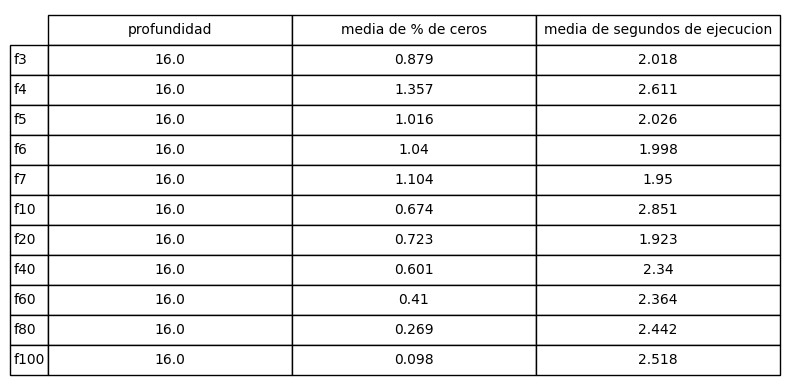

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# ejes ocultos
ax.axis('off')
ax.axis('tight')

# Crea tabla
table = ax.table(cellText=tabla.round(3).values,
                 colLabels=tabla.columns,
                 rowLabels=tabla.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()